# Task 4.10 Part 1 - Customer Profiles and Crosstabs

## CONTENTS

#### *Important note Due to the large dataset of the data and RAM, the main dataframe has a 30% random sample from the original dataframe at the end of 4.9.*

#### 1. Importing libraries and data


#### 2.  Data checks and preparation
    2a. Main dataframe overview
    2b. Department dataframe overview
    2c. Merging the main and department dataframe together.  

#### 3. Addressing PII concerns
    - Removed first_name & last_name due to PII concerns
    - Removed the following columns to save space and reduce columns:
        - department_id
        - merge
        - aisle_id
        - Unnamed: 0_y

#### 4. Create regions, viewing region information, and region flags

    4a. Create regions  
    4b. Data exploration on regions
            - -Number of customers in each region
            -- Number of states in each region
            -- Sales by region
            --Products sold by region. 
    4c. Create region dataframe with aggregated variables       
            -- Aggregated counts by region
            -- average price per order
	        -- average price per customer
	        -- average orders placed by customer
	        --What region spends the most in average price per customer
#### 5. Subset data    
   
     5a. Create customer and order subset 
     5b. Crosstab to view customer loyalty in each region
     5c. Percentage of customers in each region based on region population
    
#### 6. Exclusion flag for low activity customers
	6a. Create dataframe subset for low activity customers with less than 5 orders. 
	6b. Create dataframe subset for normal activity customers with > = 5 orders. 
	6c. Exporting low and normal activity dataframes
           
#### NOTE: The dataframe going forward for normal activity customers is df3
      
#### 7. Customer profile variables
	7a. Age ranges
         * Age range 1 = Young Adult, 
         * Age range 2 = Adult
         * Age range 3 = Senior
         
	7b. Time of day brackets
         * early morning = 12:00 am - 05:59 am 
         * morning = 06:00 am - 11:59 pm 
         * afternoon = 12:00 pm - 04:59 pm 
         * evening = 05:00 pm - 07:59 pm 
         * night = 08:00 pm - 11:59 pm
         
	7c. Pet flag
         1 = pet product purchase
         0 = no pet product purchase
         
	7d. Baby flag
         1 = baby product purchase
         0 = no baby product purchase
         
	7e. Snack flag
         1 = snack purchase
         0 = no snack purchase
         
	7f. Income Grouping
         Income Breakdown
           * Below 52,200 = Low Income
           * Between 52,200 & 156,600 = Middle Income
           * Above 156,600 = High Income


#### 8.  Final overview of dataframe(s)
#### 9.  Exporting file(s)


## 1. Importing libraries and data

In [84]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [85]:
path = r'C:\Users\there\Desktop\Career Foundry\06.2022 Instacart Basket Analysis'

In [86]:
df = pd.read_pickle(os.path.join(path,'02 - Data', 'Prepared Data', '4.9_revamped_smalldf.pkl'))

In [87]:
df_departments = pd.read_csv(os.path.join(path,'02 - Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

## 2. Data checks & preparation

### 2a. Main dataframe overview

In [88]:
# overview
df.head()

,order_id,customer_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,#_of_dependants,marital_status,income,max_order,avg_price,spending_flag,median_order_duration,frequency_flag,loyalty_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,2/17/2019,3,married,40423,10,6.367797,Low Spender,20.5,Non-Frequent Customer,New Customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,2/17/2019,3,married,40423,10,6.367797,Low Spender,20.5,Non-Frequent Customer,New Customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,2/17/2019,3,married,40423,10,6.367797,Low Spender,20.5,Non-Frequent Customer,New Customer
6,550135,1,prior,7,1,9,20.0,196,1,1,...,2/17/2019,3,married,40423,10,6.367797,Low Spender,20.5,Non-Frequent Customer,New Customer
10,2539329,1,prior,1,2,8,NaN,14084,2,0,...,2/17/2019,3,married,40423,22,3.980556,Low Spender,10.0,Frequent Customer,Regular Customer


In [89]:
# checking columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721457 entries, 0 to 32406037
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   customer_id             int32   
 2   eval_set                object  
 3   order_number            int8    
 4   order_day_of_week       int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float64 
 7   product_id              int32   
 8   add_to_cart_order       int16   
 9   reordered               int8    
 10  Unnamed: 0              int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  _merge                  category
 16  price_range_loc         object  
 17  Busiest day             object  
 18  Busiest days            object  
 19  Most Orders             object  
 20  first_name              object  
 21  last_na

In [90]:
# checking columns/rows
df.shape

(9721457, 35)

### 2b. Department dataframe overview

In [91]:
# dataframe overview
df_departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [92]:
# checking columns and datatypes
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [93]:
# changing datatype to reduce RAM
df_departments['Unnamed: 0'] = df_departments['Unnamed: 0'].astype('int8')

In [94]:
# checking rows/columns
df_departments.shape

(21, 2)

### 2c. Merging the main and department dataframe together

In [95]:
%%time
# merging department names into one big dataframe
df = df.merge(df_departments, how = 'inner', left_on='department_id', right_index=True) 

CPU times: total: 3.56 s
Wall time: 3.56 s


In [96]:
# viewing specific columns
df[['product_id', 'department_id', 'department']].head()

,product_id,department_id,department
0,196,7,pets
2,196,7,pets
3,196,7,pets
6,196,7,pets
60,196,7,pets


## 3.  Addressing PII concerns

    Plan: 
    - Drop customer_first and last_name due to customer_id is a unique identifier to connect data with each customer.
    - Drop department_id, _merge, aisle_id, and Unnamed:0_y, to save RAM and create fewer columns. 

In [97]:
# create new dataframe with dropped columns
df2 = df.drop(columns = ['first_name', 'last_name', 'department_id', '_merge', 'aisle_id', 'Unnamed: 0_y'])

## 4. Create regions, view region data, and creating region_flags

### 4a. Create regions

In [98]:
# creating region series with all appropriate states
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
             'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
          'North Dakota', 'South Dakota', 'Nebraska', 'Kansas',
          'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
         'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee',
         'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona',
        'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [99]:
# create new region column identifying the regions
df2.loc[df2['state'].isin(northeast), 'region'] = 'northeast'
df2.loc[df2['state'].isin(midwest), 'region'] = 'midwest'
df2.loc[df2['state'].isin(south), 'region'] = 'south'
df2.loc[df2['state'].isin(west), 'region'] = 'west'

In [100]:
# ensuring that all records were accounted for
df2['region'].value_counts(dropna=False)

south        3231022
west         2482933
midwest      2274588
northeast    1712325
Name: region, dtype: int64

### 4b. Data exploration on regions

#### Number of customers in each region

In [101]:
# checking frequency of regions
df2[['region', 'customer_id']].groupby('region').agg({'customer_id': pd.Series.nunique,}).sort_values(by='customer_id', ascending=False)

,customer_id
region,
south,68464
west,52375
midwest,48346
northeast,36255


    Results: The south region has the most customers, while the northeast has the fewest customers. 

#### Number of states in each region

In [102]:
# seeing how many states are in each region
df2[['region', 'state']].groupby('region').agg({'state': pd.Series.nunique,}).sort_values(by='state', ascending=False)

,state
region,
south,17
west,13
midwest,12
northeast,9


    Results:  There are the most states in the south region and fewest states in the northeast region. This corresponds with the most customer_id's in the south and fewest customer id's in the northeast. 

#### Sales by region

In [103]:
# checking what region customers spend the most in sales
df2[['prices', 'region']].groupby('region').agg('sum').sort_values(by ='prices', ascending=False)

,prices
region,
south,25175488.3
west,19329761.7
midwest,17719063.7
northeast,13323573.2


    Results: The south spends the most and the northeast spends the least.

#### Products sold by region

In [104]:
# products sold by region
df2[['region', 'product_id']].groupby(['region']).agg('count').sort_values(by='product_id', ascending=False)

,product_id
region,
south,3231022
west,2482933
midwest,2274588
northeast,1712325


### 4c. Create region dataframe to show aggregate values

In [105]:
# creating a new dataframe that summarizes the data by region
df_region = df2[['prices', 'region', 'customer_id', 'order_id']].groupby(['region']).agg({'prices':'sum', 'customer_id': pd.Series.nunique, 'order_id' : pd.Series.nunique})

In [106]:
# viewing output
df_region

,prices,customer_id,order_id
region,,,
midwest,17719063.7,48346,650524
northeast,13323573.2,36255,488726
south,25175488.3,68464,924656
west,19329761.7,52375,709088


In [107]:
# renaming the columns so that it is clear
df_region = df_region.rename(columns={'prices':'sum_of_sales', 'customer_id':'customer_count', 'order_id':'orders_placed'})

In [108]:
# viewing output
df_region

,sum_of_sales,customer_count,orders_placed
region,,,
midwest,17719063.7,48346,650524
northeast,13323573.2,36255,488726
south,25175488.3,68464,924656
west,19329761.7,52375,709088


### Aggregated data by region

#### average price per order

In [109]:
# creating column for average price per oder
df_region['avg_price_per_order'] = df_region['sum_of_sales']/df_region['orders_placed'] 

#### average price per customer

In [110]:
# creating column for average price per customer
df_region['avg_price_per_customer'] = df_region['sum_of_sales']/df_region['customer_count']

#### average orders placed by customer

In [111]:
# creating column for average orders placed by customer
df_region['avg_orders_per_customer'] = df_region['orders_placed']/df_region['customer_count']

In [112]:
# viewing dataframe
df_region

,sum_of_sales,customer_count,orders_placed,avg_price_per_order,avg_price_per_customer,avg_orders_per_customer
region,,,,,,
midwest,17719063.7,48346,650524,27.238140,366.505268,13.455591
northeast,13323573.2,36255,488726,27.261847,367.496158,13.480237
south,25175488.3,68464,924656,27.226870,367.718630,13.505726
west,19329761.7,52375,709088,27.260032,369.064663,13.538673


#### What region has the highest average price per customer? 

In [113]:
# viewing sorted data by price per customer to see what region customers spend the most in
df_region.sort_values(by='avg_price_per_customer', ascending=False)

,sum_of_sales,customer_count,orders_placed,avg_price_per_order,avg_price_per_customer,avg_orders_per_customer
region,,,,,,
west,19329761.7,52375,709088,27.260032,369.064663,13.538673
south,25175488.3,68464,924656,27.226870,367.718630,13.505726
northeast,13323573.2,36255,488726,27.261847,367.496158,13.480237
midwest,17719063.7,48346,650524,27.238140,366.505268,13.455591


    Results: The WEST! Even though the south has more states, more customers, and higher sales, and more orders placed, 
    the customers in the west region spend more than those in the south region. 

## 5.  Subset data

### 5a. Creating customer and order subset that does not contain duplicates

In [114]:
# create a dataframe that just lists customers
customers = df2.drop_duplicates(subset=['customer_id'])
customers.shape

(205440, 32)

In [115]:
# create a dataframe that lists just orders
df_orders = df2.drop_duplicates(subset='order_id').copy()
df_orders.shape

(2772994, 32)

### 5b. Crosstab for customer loyalty in each region

In [116]:
# using crosstab to view cutomer loyalty in the each region
cross_customers=pd.crosstab(customers['region'], customers['loyalty_flag'], dropna=False)
cross_customers

loyalty_flag,Loyal Customer,New Customer,Regular Customer
region,,,
midwest,14684,9677,23985
northeast,11138,7288,17829
south,21133,13757,33574
west,16210,10409,25756


    Results:  
           * South - has the most loyal, new, and regular customers
           * Northeast - has the fewest loyal, new, and regular customers

### 5c. Percentage of customers in each region based on region population

In [117]:
#### viewing percentage of customers in each region based on region population
print('midwest: ', round(cross_customers.iloc[0,0]/48346*100, 2),'%')
print('northeast: ', round(cross_customers.iloc[1,0]/36255*100, 2),'%')
print('south: ', round(cross_customers.iloc[2,0]/68464*100, 2),'%')
print('west: ', round(cross_customers.iloc[3,0]/52375*100, 2),'%')

midwest:  30.37 %
northeast:  30.72 %
south:  30.87 %
west:  30.95 %


    Results:  Loyal customer is defined as more than 40 orders. All regions are fairly similar in percentage of loyal customers; however, the WEST region has the largest percetage of loyal customers based of the WEST total population of customers.  This was calculated for example by: 

    * West Region = 16210 Loyal Customers / 52375 Total Customers (16210 Loyal + 10409 New + 25756 Regular) * 100 = 30.95%

## 6. Creating exclusion flag for low activity customers

In [118]:
# creating exclusion flag
df2.loc[df2['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'
df2.loc[df2['max_order']>= 5, 'exclusion_flag'] = 'Normal activity customer'
df2['exclusion_flag'].value_counts(dropna=False)

Normal activity customer    9270020
Low activity customer        430848
Name: exclusion_flag, dtype: int64

### 6a. Create dataframe subset for low activity customers with < 5 orders

In [119]:
# creating subset dataframe for low activity customers 
df_low_activity = df2[df2['exclusion_flag']=='Low activity customer']
df_low_activity.shape

(430848, 33)

### 6b. Create dataframe subset for normal activity customers with > = 5 orders

In [120]:
# creating subset dataframe for normal activity customers
df3 = df2[df2['exclusion_flag']=='Normal activity customer'].copy()
df3.shape

(9270020, 33)

In [121]:
df3.exclusion_flag.value_counts()

Normal activity customer    9270020
Name: exclusion_flag, dtype: int64

In [122]:
# checking to ensure that only normal activity customer populates. 

In [123]:
print(df3['exclusion_flag'].unique())

['Normal activity customer']


In [124]:
# making certain there are no missing values
df3['exclusion_flag'].value_counts(dropna = False)


Normal activity customer    9270020
Name: exclusion_flag, dtype: int64

### 6c. Export low and normal activity dataframes

In [125]:
# exporting low activity customer subset
df_low_activity.to_pickle(os.path.join(path, '02 - Data','Prepared Data', '4.10_low_activity_customers.pkl'))

In [126]:
# exporting normal activity customer subset
df3.to_pickle(os.path.join(path, '02 - Data','Prepared Data', '4.10_normal_activity_customers.pkl'))

#### NOTE** going forward the new dataframe for customers that have >= 5 orders is df3.

## 7. Customer profile variables

### 7a. Age ranges

In [127]:
# dividing customers into age groups

    # Age range 1 = Young Adult, 
    # Age range 2 = Adult
    # Age range 3 = Senior

In [128]:
# using .loc to divide ages of customers
df3.loc[(df3['age'] >= 18) & (df3['age'] <= 35), 'age_range'] = '1'
df3.loc[(df3['age'] > 35) & (df3['age'] <= 64), 'age_range'] = '2'
df3.loc[(df3['age'] > 64), 'age_range'] = '3'
df3['age_range'].value_counts()

2    4200955
1    2617986
3    2451079
Name: age_range, dtype: int64

    Results: The most common age of instacart customers are between the ages of 36-64. 

### 7b. Time of day brackets

Time of day breakdown: 
* 12:00 am - 05:59 am = early morning
* 06:00 am - 11:59 pm = morning
* 12:00 pm - 04:59 pm = afternoon
* 05:00 pm - 07:59 pm = evening
* 08:00 pm - 11:59 pm = night

In [129]:
# creating a list to break down certain periods of the day
df_orders.loc[(df_orders['order_hour_of_day'] > 0) & (df_orders['order_hour_of_day'] < 6), 'time_of_day'] = 'early_morning'
df_orders.loc[(df_orders['order_hour_of_day'] >= 6) & (df_orders['order_hour_of_day'] < 12), 'time_of_day'] = 'morning'
df_orders.loc[(df_orders['order_hour_of_day'] >= 12) & (df_orders['order_hour_of_day'] < 17), 'time_of_day'] = 'afternoon'
df_orders.loc[(df_orders['order_hour_of_day'] >= 17) & (df_orders['order_hour_of_day'] < 20), 'time_of_day'] = 'evening'
df_orders.loc[(df_orders['order_hour_of_day'] >= 20) & (df_orders['order_hour_of_day'] < 24), 'time_of_day'] = 'night'
df_orders['time_of_day'].value_counts()

afternoon        1127290
morning           917551
evening           445461
night             231910
early_morning      32404
Name: time_of_day, dtype: int64

In [130]:
df_orders.head()

,order_id,customer_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,income,max_order,avg_price,spending_flag,median_order_duration,frequency_flag,loyalty_flag,department,region,time_of_day
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,40423,10,6.367797,Low Spender,20.5,Non-Frequent Customer,New Customer,pets,south,morning
2,473747,1,prior,3,3,12,21.0,196,1,1,...,40423,10,6.367797,Low Spender,20.5,Non-Frequent Customer,New Customer,pets,south,afternoon
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,40423,10,6.367797,Low Spender,20.5,Non-Frequent Customer,New Customer,pets,south,morning
6,550135,1,prior,7,1,9,20.0,196,1,1,...,40423,10,6.367797,Low Spender,20.5,Non-Frequent Customer,New Customer,pets,south,morning
60,1870022,15,prior,17,2,16,8.0,196,6,1,...,54313,19,6.441221,Low Spender,11.5,Regular Customer,Regular Customer,pets,midwest,afternoon


<AxesSubplot:>

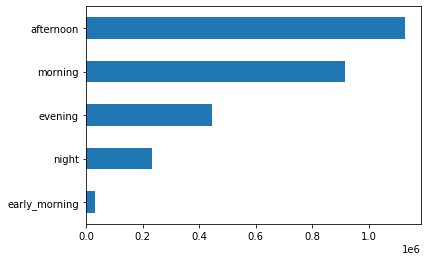

In [131]:
df_orders['time_of_day'].value_counts().sort_values().plot.barh()

    Results:  Between 6a-5p are when customers purchase the most orders.  Fewest orders are placed in the early morning of hours between 12a-6a. 

### Viewing unqiue values in department column

In [132]:
print(df3['department'].unique())

['pets' 'household' 'deli' 'babies' 'alcohol' 'dairy eggs' 'other'
 'breakfast' 'meat seafood' 'produce' 'bulk' 'missing' 'canned goods'
 'international' 'beverages' 'pantry' 'dry goods pasta' 'snacks' 'bakery'
 'personal care']


### 7c. Pet flag

In [133]:
# first, identify all the products purchased from the pet department
df3['pet_stuff'] = [1 if x == 'pets' else 0 for x in df3['department']]

In [134]:
# then, apply it across the whole customer's orders
df3['pet_stuff'] = df3.groupby(['customer_id'])['pet_stuff'].transform('max')

In [135]:
# reduce datatype to save RAM
df3['pet_stuff'] = df3['pet_stuff'].astype('int8')

### 7d. Baby flag

In [136]:
# first, identify all the products purchased from the baby department
df3['baby_stuff'] = [1 if x == 'babies' else 0 for x in df3['department']]

In [137]:
# then, apply it across the whole customer's orders
df3['baby_stuff'] = df3.groupby(['customer_id'])['baby_stuff'].transform('max')

In [138]:
# change data type to save RAM
df3['baby_stuff'] = df3['baby_stuff'].astype('int8')

### 7e. Snack flag

In [139]:
# first, identify all the products purchased from the snacks department
df3['snacks'] = [1 if x == 'snacks' else 0 for x in df3['department']]

In [140]:
# then, apply it just across the individual order
df3['snacks'] = df3.groupby(['order_id'])['snacks'].transform('max')

In [141]:
# change datatype to reduce RAM
df3['snacks'] = df3['snacks'].astype('int8')

### 7f. Income Grouping

Income Breakdown

* Below 52,200 = Low Income

* Between 52,200 & 156,600 = Middle Income

* Above 156,600 = High Income

In [142]:
# creating income flags
df3.loc[df3['income']<52200, 'income_flag'] = 'Low Income'
df3.loc[(df3['income']>=52200) & (df3['income']<=156600), 'income_flag'] = 'Middle Income' 
df3.loc[df3['income']>156600, 'income_flag'] = 'High Income'
df3['income_flag'].value_counts(dropna = False)

Middle Income    7328726
Low Income       1129094
High Income       812200
Name: income_flag, dtype: int64

        Results:  Most of Instacart customers fall in the Middle Income bracket. Incomes ranges determined by this article: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system

## 8. Final overview of dataframes

In [143]:
df3.head()

,order_id,customer_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,loyalty_flag,department,region,exclusion_flag,age_range,pet_stuff,baby_stuff,snacks,income_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-Frequent Customer,New Customer,pets,south,Normal activity customer,1,1,1,0,Low Income
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-Frequent Customer,New Customer,pets,south,Normal activity customer,1,1,1,0,Low Income
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-Frequent Customer,New Customer,pets,south,Normal activity customer,1,1,1,0,Low Income
6,550135,1,prior,7,1,9,20.0,196,1,1,...,Non-Frequent Customer,New Customer,pets,south,Normal activity customer,1,1,1,0,Low Income
60,1870022,15,prior,17,2,16,8.0,196,6,1,...,Regular Customer,Regular Customer,pets,midwest,Normal activity customer,3,1,1,0,Middle Income


In [144]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9270020 entries, 0 to 32390080
Data columns (total 38 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   customer_id             int32  
 2   eval_set                object 
 3   order_number            int8   
 4   order_day_of_week       int8   
 5   order_hour_of_day       int8   
 6   days_since_prior_order  float64
 7   product_id              int32  
 8   add_to_cart_order       int16  
 9   reordered               int8   
 10  Unnamed: 0_x            int64  
 11  product_name            object 
 12  prices                  float64
 13  price_range_loc         object 
 14  Busiest day             object 
 15  Busiest days            object 
 16  Most Orders             object 
 17  gender                  object 
 18  state                   object 
 19  age                     int8   
 20  date_joined             object 
 21  #_of_dependants         int8  

In [145]:
# checking shapes of each dataset before closing out
df3.shape

(9270020, 38)

In [146]:
df.shape

(9700868, 37)

In [147]:
df_region.shape

(4, 6)

## 9. Exporting files

In [148]:
%%time
# exporting main dataframe df3 to pickle file
# this set contains all the normal activity customers and additional flags/profiling
df3.to_pickle(os.path.join(path, '02 - Data','Prepared Data', '4.10_part1.pkl'))

CPU times: total: 6.12 s
Wall time: 6.75 s


In [149]:
%%time
# exporting region dataframe df_region to pickle file
# this set contains all the region information based on the 30% sample size. 
df_region.to_pickle(os.path.join(path, '02 - Data','Prepared Data', '4.10_region.pkl'))

CPU times: total: 0 ns
Wall time: 997 µs
